In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

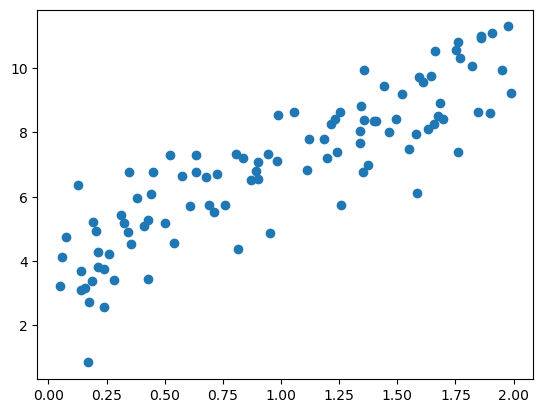

In [4]:
plt.scatter(X, y)

Calculating normal equation for linear regression
Q^ =( X^T X )^-1 X^T y

In [5]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[3.65142597],
       [3.32546907]])

In [7]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.65142597],
       [10.3023641 ]])

(0.0, 2.0, 0.0, 15.0)

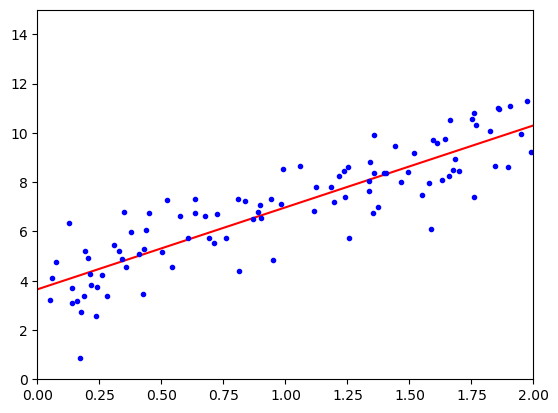

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])

now  doing the same using linear regression

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)

lin_reg.intercept_, lin_reg.coef_

(array([3.65142597]), array([[3.32546907]]))

In [10]:
lin_reg.predict(X_new)

array([[ 3.65142597],
       [10.3023641 ]])

Linear Regression class is based on scipy.linalg.lstsq() function 

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd #SVD = singular value decomposition

array([[3.65142597],
       [3.32546907]])

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[3.65142597],
       [3.32546907]])

## Implementing Gradient Descent

In [13]:
eta = 0.1 # Learning rate
n_iterations = 1000
m = 100

In [14]:
theta = np.random.randn(2,1)

for iterations in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [15]:
theta

array([[3.65142597],
       [3.32546907]])

## Implementing Stochastic Geadient Descent

In [16]:
n_epochs = 50 
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/ (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i )
        theta = theta - eta * gradients
        

In [17]:
theta

array([[3.62938613],
       [3.3360898 ]])

In [18]:
from sklearn.linear_model import SGDRegressor 

sgd_reg = SGDRegressor(max_iter=1000, tol = 1e-3, penalty = None, eta0=0.01)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_,sgd_reg.coef_

(array([3.38734484]), array([3.55033751]))

## Polynomial Regression

In [19]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

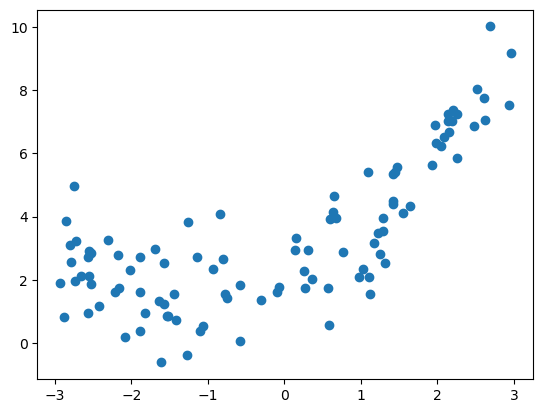

In [20]:
plt.scatter(X, y)

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.4272999])

In [22]:
X_poly[0]

array([-2.4272999 ,  5.89178482])

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.98231102]), array([[1.05873678, 0.46383004]]))

## Learning Curves

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [28]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

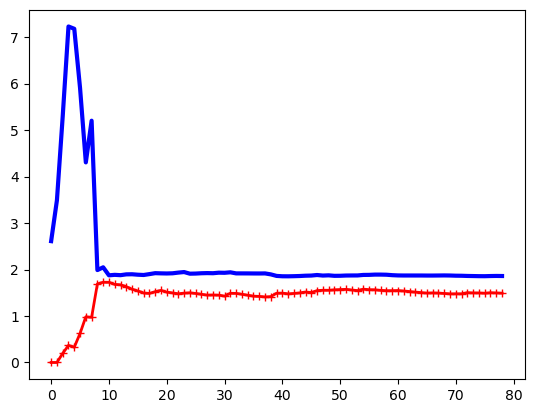

In [31]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X,y)

If your model is underfitting the training data, adding more training examples will not help. You need to use a more complex model or come up with better features.

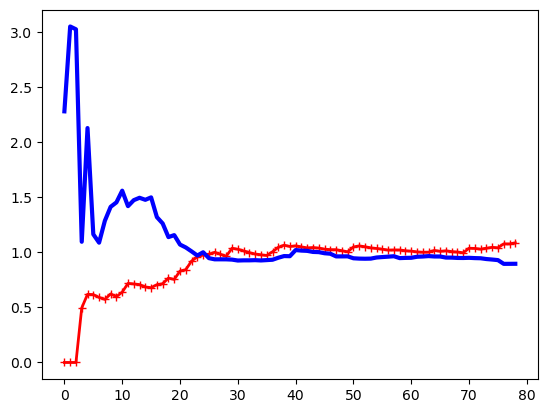

In [34]:
# now let's look at the 10th degree polynomial on the same data

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)